# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
from src.Coalition_Compromising import find_stable_coalitions_by_compromising
import os
import numpy as np 
import pandas as pd

In [2]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

This is the voting input

In [3]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting_table = voting.to_pandas()
voting_table

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


(7, 200)
None


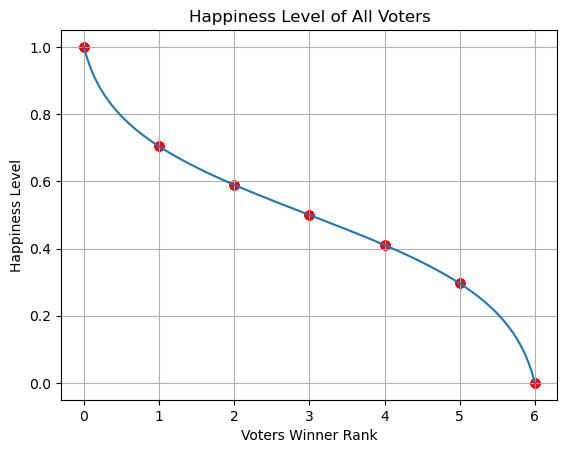

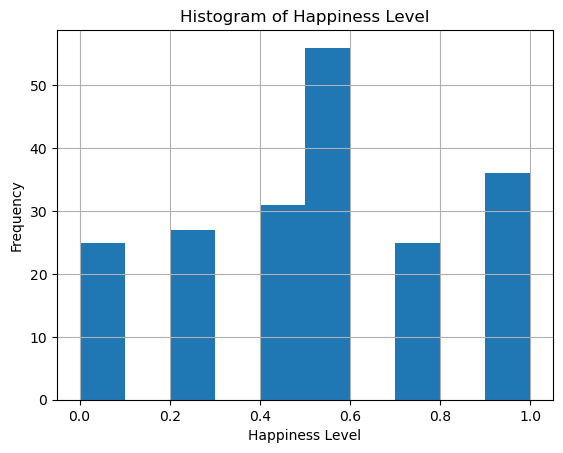

In [4]:
n_cand = 7
random_voting = utils.random_voting(200, n_cand)
print(random_voting.shape)
result_random = plurality_outcome(random_voting)
hlevel = HappinessLevel(random_voting, result_random.winner)
print(hlevel._all_happiness_level)
hlevel.plot()
hlevel.histogram()

## Strategic Voting

In [5]:
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


In [6]:
result = plurality_outcome(voting)
result

Winner: C
{'A': 1, 'B': 2, 'C': 3, 'D': 0}

Note that **voter 5** is the only voter that can engage in strategic voting. Voter 5 prefers $B$ over the winner $C$. Hence, they can increase their $\text{Happiness Level}$ by placing $B$ as their first preference, resulting in a tie between $C$ and $B$ in the voting outcome (for plurality, voting for two, Borda). Since ties are resolved in alphabetical order, $B$ wins over $C$.

The table below displays the two voting strategies available to voter 5.

In [7]:
happiness_level = HappinessLevel(voting, result.winner)
strategic_voting = StrategicVoting(voting).run(happiness_level, plurality_outcome)

strategic_voting.all

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487
1,5,"[B, D, A, C]",B,0.410487,0.0,2.820973,3.410487


The table displays the best strategic voting for each voter

In [8]:
strategic_voting.best

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487


Strategic Voting Risk

In [9]:
strategic_voting.risk

0.13682886358890622

# ADVANCED TVA Using Clustering + Compromising
The idea is to use Clustering plus Compromising. We try to find the stable coalitions that garantee an increase of happiness for all their partecipants

In [15]:
voting_df= pd.DataFrame(random_voting).T
coal= find_stable_coalitions_by_compromising(150, voting_df, hlevel, result_random)


Pushing C made everyone in the group 4 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 29, 'F': 19, 'G': 28}
Pushing C made everyone in the group 46 happier, here the new winner:   Winner: C
{'A': 24, 'B': 24, 'C': 36, 'D': 36, 'E': 31, 'F': 19, 'G': 28}
Pushing C made everyone in the group 9 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 29, 'F': 19, 'G': 28}
Pushing C made everyone in the group 0 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 31, 'F': 17, 'G': 28}
Pushing C made everyone in the group 2 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 31, 'F': 17, 'G': 28}
Pushing C made everyone in the group 6 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 31, 'F': 17, 'G': 28}
Pushing C made everyone in the group 14 happier, here the new winner:   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 31, '

In [16]:
import pprint

pprint.pprint(coal)

([(     0  1  2  3  4  5  6         H  gruppo           manipulation     New_H
55   E  C  D  B  G  F  A  0.589513       4  [C, E, D, B, G, F, A]  0.703890
134  E  B  C  A  G  F  D  0.000000       4  [C, E, B, A, G, F, D]  0.589513,
   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 29, 'F': 19, 'G': 28}),
  (     0  1  2  3  4  5  6        H  gruppo           manipulation  New_H
95   B  A  F  C  G  D  E  0.29611      46  [C, B, A, F, G, D, E]    0.5
152  C  A  F  D  G  E  B  0.50000      46  [C, A, F, D, G, E, B]    1.0,
   Winner: C
{'A': 24, 'B': 24, 'C': 36, 'D': 36, 'E': 31, 'F': 19, 'G': 28}),
  (     0  1  2  3  4  5  6         H  gruppo           manipulation     New_H
55   E  C  D  B  G  F  A  0.589513       9  [C, E, D, B, G, F, A]  0.703890
134  E  B  C  A  G  F  D  0.000000       9  [C, E, B, A, G, F, D]  0.589513,
   Winner: C
{'A': 24, 'B': 25, 'C': 37, 'D': 36, 'E': 29, 'F': 19, 'G': 28}),
  (     0  1  2  3  4  5  6    H  gruppo           manipulation    New_H
77   F